In [32]:
import pandas as pd
orders=pd.read_csv('./data/orders.csv')

In [33]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [34]:
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


## 결측치 및 이상치 확인

In [4]:
orders['eval_set'].unique()

array(['prior', 'train', 'test'], dtype=object)

In [5]:
orders[orders['eval_set']=='test']

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0
...,...,...,...,...,...,...,...
3420918,2728930,206202,test,23,2,17,6.0
3420929,350108,206204,test,5,4,14,14.0
3421001,1043943,206206,test,68,0,20,0.0
3421018,2821651,206207,test,17,2,13,14.0


## Eval_set에 대한 처리
- eval_Set = test는 제거해야함


In [7]:
# eval_set 각 값별로 몇개 있는지 확인 visualize
eval_count=orders.groupby('eval_set')['order_id'].count().reset_index()

In [11]:
eval_count

,eval_set,eval_set_count
0,prior,3214874
1,test,75000
2,train,131209


In [9]:
eval_count.rename(columns={'order_id': 'eval_set_count'}, inplace=True)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


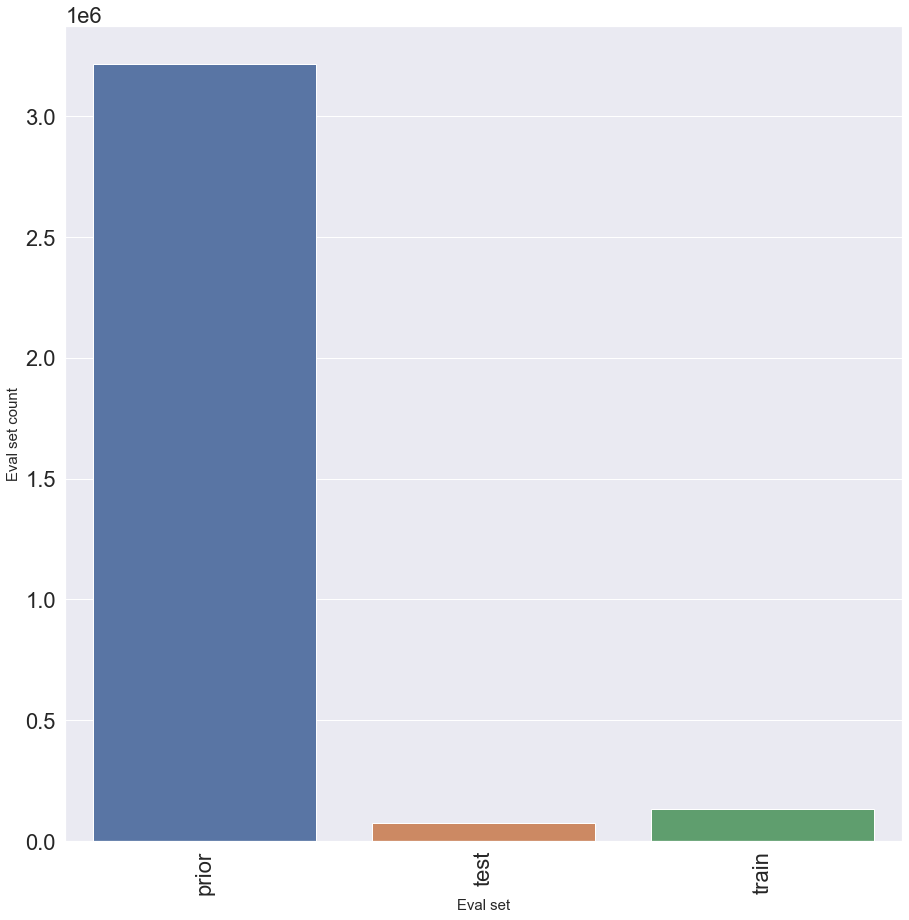

In [12]:
sns.set(font_scale=2)
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(15, 15))
plt.xticks(rotation='vertical')
sns.barplot(eval_count.eval_set, eval_count.eval_set_count)          
plt.ylabel('Eval set count', fontsize=15)
plt.xlabel('Eval set', fontsize=15)
# plt.show()
plt.savefig('hypo9.png')

In [35]:
# eval_set=test 제거하기
orders=orders[orders['eval_set']!='test']

In [36]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


### 사용하지 않는 column 제거

In [37]:
orders.drop(['user_id','order_dow','order_hour_of_day','days_since_prior_order'], axis=1, inplace=True)

In [38]:
orders.head()

,order_id,eval_set,order_number
0,2539329,prior,1
1,2398795,prior,2
2,473747,prior,3
3,2254736,prior,4
4,431534,prior,5


## 첫 주문에 많이 구매한 상품과 이후 주문에 많이 구매한 상품이 다를것이다. 
- 첫 구매인 경우 : order_number=1인 경우 
- 첫 구매가 아닌경우 : order_number!=1인 경우

### 1) 첫주문 내역 & 재구매 내역 분리

In [39]:
# 첫 주문 내역 추출
first_order=orders[orders['order_number']==1]

In [40]:
first_order.head()

,order_id,eval_set,order_number
0,2539329,prior,1
11,2168274,prior,1
26,1374495,prior,1
39,3343014,prior,1
45,2717275,prior,1


In [41]:
# 재주문 내역 추출
not_first_order=orders[orders['order_number']!=1]

In [43]:
not_first_order.head()

,order_id,eval_set,order_number
1,2398795,prior,2
2,473747,prior,3
3,2254736,prior,4
4,431534,prior,5
5,3367565,prior,6


## 2) 첫 주문일 때 많이 구입한 상품 best 20

In [45]:
order_info=pd.read_csv('./data/order_info.csv')

In [46]:
order_info.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered
0,0,1,49302,1,1
1,1,1,11109,2,1
2,2,1,10246,3,0
3,3,1,49683,4,0
4,4,1,43633,5,1


In [47]:
order_info=order_info.iloc[:,1:]

In [48]:
order_info.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


### 2-1) first_order & order_info의 order_id 기준으로 merge
- 첫 주문내역의 상세 정보를 파악하기 위해서

In [53]:
# firstorder & order_info merge
f_order=pd.merge(first_order, order_info)

In [63]:
f_order.head()

,order_id,product_id
0,2539329,196
1,2539329,14084
2,2539329,12427
3,2539329,26088
4,2539329,26405


In [55]:
# 필요없는 column 제거
f_order.drop(['eval_set','order_number','reordered','add_to_cart_order' ], axis=1, inplace=True)

In [57]:
f_order.head()

,order_id,product_id
0,2539329,196
1,2539329,14084
2,2539329,12427
3,2539329,26088
4,2539329,26405


### 2-2) 첫구매 내역에서 각 상품의 주문횟수를 알기위해 groupby 수행

In [58]:
num_of_f_order=f_order.groupby(by='product_id').count().reset_index()

In [61]:
num_of_f_order.rename(columns={'order_id':'order_cnt'}, inplace=True)

In [64]:
num_of_f_order.head()

,product_id,order_cnt
0,1,98
1,2,3
2,3,17
3,4,39
4,5,1


In [67]:
products=pd.read_csv('./data/products.csv')

### 2-3) 어떤 제품이 많이 팔리는지 알기 위해서 MERGE수행

In [73]:
# 어떤 제품이 많이 팔리는지 알기 위해서 MERGE수행
num_of_f_order=pd.merge(num_of_f_order, products)

In [75]:
num_of_f_order=num_of_f_order.drop(['aisle_id','department_id'] , axis=1)

In [76]:
num_of_f_order.head()

,product_id,order_cnt,product_name
0,24852,29534,Banana
1,13176,19158,Bag of Organic Bananas
2,21137,16464,Organic Strawberries
3,47766,15187,Organic Avocado
4,21903,14948,Organic Baby Spinach


In [77]:
# order_cnt을 내림차순으로 정렬
num_of_f_order=num_of_f_order.sort_values(by='order_cnt', ascending=False)

In [81]:
num_of_f_order.head()

,product_id,order_cnt,product_name
0,24852,29534,Banana
1,13176,19158,Bag of Organic Bananas
2,21137,16464,Organic Strawberries
3,47766,15187,Organic Avocado
4,21903,14948,Organic Baby Spinach


In [79]:
# 상위 20개의 데이터 추출 
f_best20=num_of_f_order[:20]

In [80]:
f_best20

,product_id,order_cnt,product_name
0,24852,29534,Banana
1,13176,19158,Bag of Organic Bananas
2,21137,16464,Organic Strawberries
3,47766,15187,Organic Avocado
4,21903,14948,Organic Baby Spinach
5,47209,11106,Organic Hass Avocado
6,16797,8660,Strawberries
7,26209,8598,Limes
8,47626,8360,Large Lemon
9,27845,7223,Organic Whole Milk


### Visualize

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


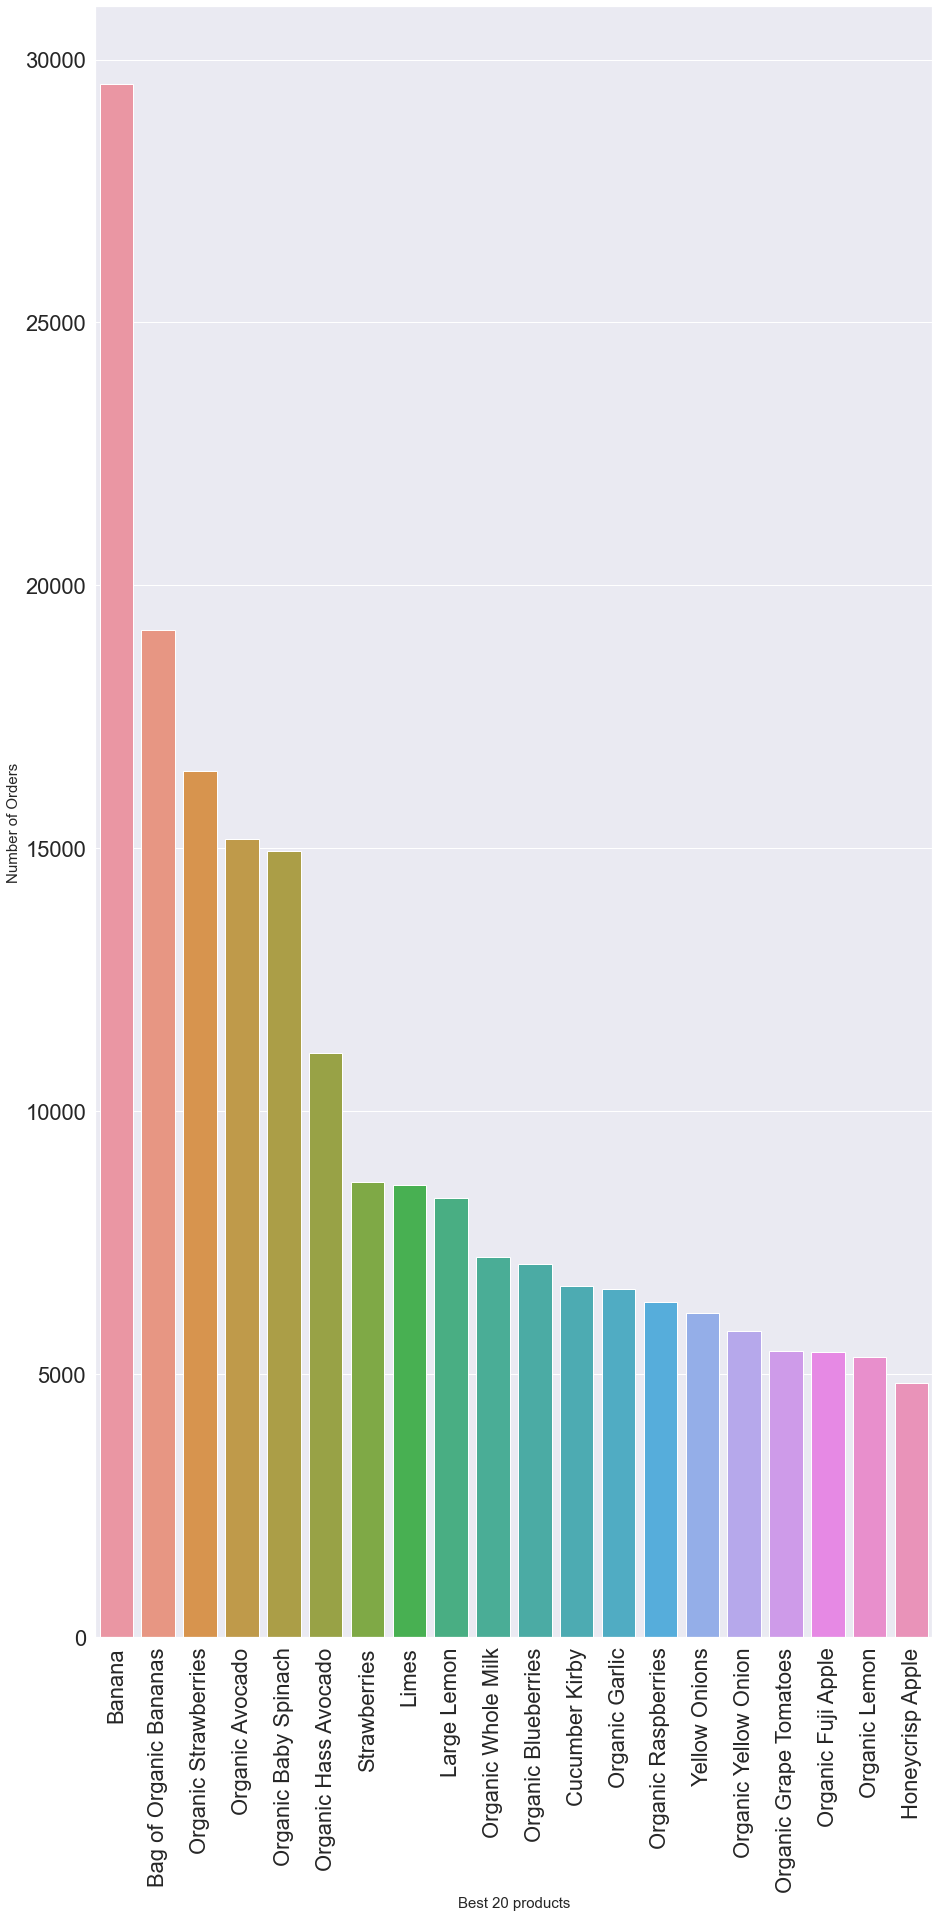

In [86]:
sns.set(font_scale=2)
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(15, 30))
plt.xticks(rotation='vertical')
sns.barplot(f_best20.product_name, f_best20.order_cnt)          
plt.ylabel('Number of Orders', fontsize=15)
plt.xlabel('Best 20 products', fontsize=15)
# plt.show()
plt.savefig('hypo10.png')

## 3. 재 주문일 때 많이 구입한 상품 best 20

In [87]:
not_first_order

,order_id,eval_set,order_number
1,2398795,prior,2
2,473747,prior,3
3,2254736,prior,4
4,431534,prior,5
5,3367565,prior,6
...,...,...,...
3421078,2266710,prior,10
3421079,1854736,prior,11
3421080,626363,prior,12
3421081,2977660,prior,13


### 3-1) not_first_order & order_info DataFrame을  merge
- 재 주문내역의 상세 정보를 파악하기 위해서


In [88]:
# firstorder & order_info merge
not_f_order=pd.merge(not_first_order, order_info )

In [89]:
not_f_order.head()

,order_id,eval_set,order_number,product_id,add_to_cart_order,reordered
0,2398795,prior,2,196,1,1
1,2398795,prior,2,10258,2,0
2,2398795,prior,2,12427,3,1
3,2398795,prior,2,13176,4,0
4,2398795,prior,2,26088,5,1


In [90]:
# 필요없는 column 제거
not_f_order.drop(['eval_set','order_number','reordered','add_to_cart_order' ], axis=1, inplace=True)

In [91]:
not_f_order.head()

,order_id,product_id
0,2398795,196
1,2398795,10258
2,2398795,12427
3,2398795,13176
4,2398795,26088


### 3-2) 재구매 내역에서 각 상품의 주문횟수를 알기위해 groupby 수행

In [92]:
num_of_nf_order=not_f_order.groupby(by='product_id').count().reset_index()

In [93]:
num_of_nf_order.rename(columns={'order_id':'order_cnt'}, inplace=True)

In [94]:
num_of_nf_order.head()

,product_id,order_cnt
0,1,1830
1,2,91
2,3,266
3,4,312
4,5,15


### 3-3) 어떤 제품이 많이 팔리는지 알기 위해서 MERGE수행

In [95]:
# 어떤 제품이 많이 팔리는지 알기 위해서 MERGE수행
num_of_nf_order=pd.merge(num_of_nf_order, products)

In [96]:
num_of_nf_order=num_of_nf_order.drop(['aisle_id','department_id'] , axis=1)

In [97]:
num_of_nf_order.head()

,product_id,order_cnt,product_name
0,1,1830,Chocolate Sandwich Cookies
1,2,91,All-Seasons Salt
2,3,266,Robust Golden Unsweetened Oolong Tea
3,4,312,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,15,Green Chile Anytime Sauce


In [99]:
# order_cnt을 내림차순으로 정렬
num_of_nf_order=num_of_nf_order.sort_values(by='order_cnt', ascending=False)

In [101]:
num_of_nf_order.head()

,product_id,order_cnt,product_name
24841,24852,461757,Banana
13168,13176,375772,Bag of Organic Bananas
21127,21137,259113,Organic Strawberries
21893,21903,236757,Organic Baby Spinach
47180,47209,209771,Organic Hass Avocado


In [102]:
nf_best20=num_of_nf_order[:20]

In [103]:
nf_best20

,product_id,order_cnt,product_name
24841,24852,461757,Banana
13168,13176,375772,Bag of Organic Bananas
21127,21137,259113,Organic Strawberries
21893,21903,236757,Organic Baby Spinach
47180,47209,209771,Organic Hass Avocado
47737,47766,169037,Organic Avocado
47597,47626,152432,Large Lemon
16788,16797,140785,Strawberries
26196,26209,138062,Limes
27951,27966,136224,Organic Raspberries


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


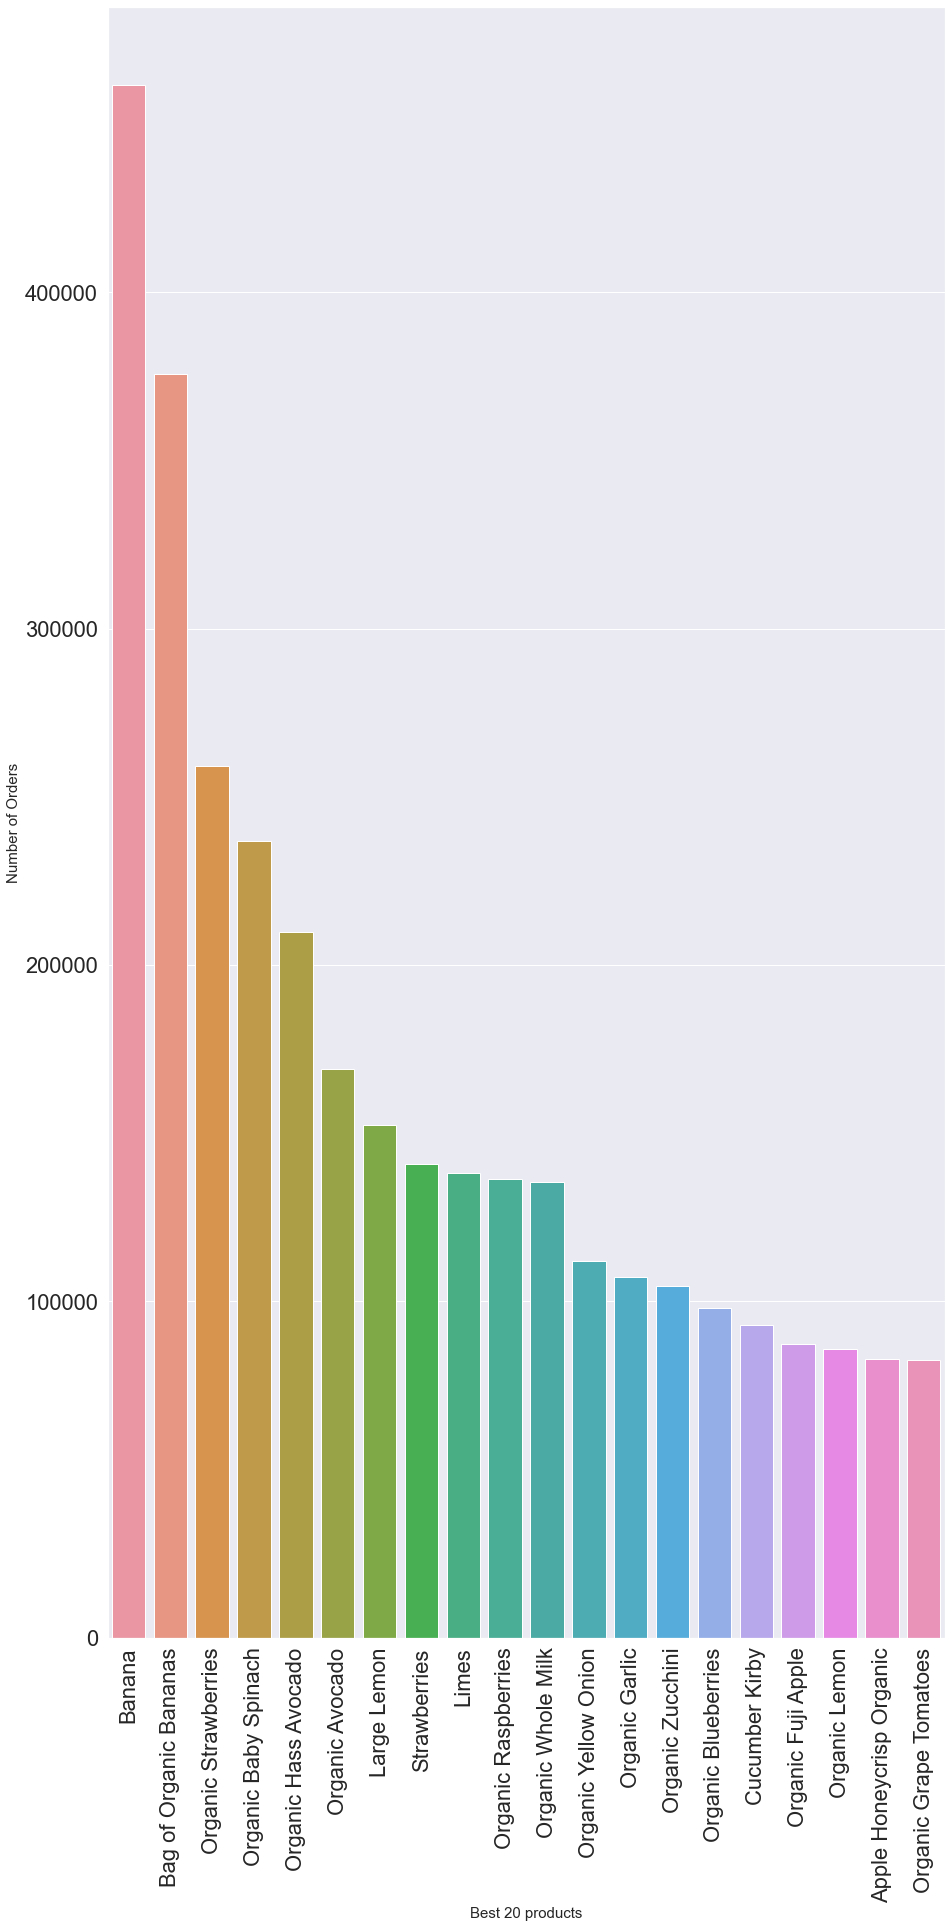

In [104]:
sns.set(font_scale=2)
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(15, 30))
plt.xticks(rotation='vertical')
sns.barplot(nf_best20.product_name, nf_best20.order_cnt)          
plt.ylabel('Number of Orders', fontsize=15)
plt.xlabel('Best 20 products', fontsize=15)
# plt.show()
plt.savefig('hypo11.png')

# 가설) 첫주문일때 판매갯수보다 재주문일때 판매갯수가 더 많다.

### 첫 주문일때

In [106]:
# 첫주문 일때의 주문내역
f_order.head()

,order_id,product_id
0,2539329,196
1,2539329,14084
2,2539329,12427
3,2539329,26088
4,2539329,26405


## 첫주문 내역에서 1개의 주문내역 당 판매하는 물건의 갯수
- f_order 에서 'order_id'당 product의 갯수
### (1). f_order 를 groupby

In [107]:
f_order=f_order.groupby(by='order_id').count().reset_index().sort_values(by='order_id')

In [108]:
f_order

,order_id,product_id
0,20,8
1,35,5
2,37,3
3,57,7
4,75,16
...,...,...
206204,3421024,5
206205,3421044,11
206206,3421046,8
206207,3421077,4


In [109]:
f_order.rename(columns={'product_id':'product_number'}, inplace=True)

In [110]:
f_order.head()

,order_id,product_number
0,20,8
1,35,5
2,37,3
3,57,7
4,75,16


## 재주문 내역에서 1개의 주문내역 당 판매하는 물건의 갯수
- nf_order 에서 'order_id'당 product의 갯수

### (1). nf_order 를 groupby

In [114]:
nf_order=pd.merge(not_first_order,order_info)

In [115]:
nf_order

,order_id,eval_set,order_number,product_id,add_to_cart_order,reordered
0,2398795,prior,2,196,1,1
1,2398795,prior,2,10258,2,0
2,2398795,prior,2,12427,3,1
3,2398795,prior,2,13176,4,0
4,2398795,prior,2,26088,5,1
...,...,...,...,...,...,...
31741033,272231,train,14,40603,4,0
31741034,272231,train,14,15655,5,0
31741035,272231,train,14,42606,6,0
31741036,272231,train,14,37966,7,0


In [117]:
nf_order.drop([ 'eval_set','order_number', 'reordered','add_to_cart_order' ], axis=1, inplace=True)

In [118]:
nf_order.head()

,order_id,product_id
0,2398795,196
1,2398795,10258
2,2398795,12427
3,2398795,13176
4,2398795,26088


In [119]:
nf_order=nf_order.groupby(by='order_id').count().reset_index().sort_values(by='order_id')

In [120]:
nf_order.rename(columns={'product_id':'product_number'}, inplace=True)

In [121]:
nf_order=nf_order.sort_values('order_id')

In [123]:
nf_order.head()

,order_id,product_number
0,1,8
1,2,9
2,3,8
3,4,13
4,5,26


## 첫 주문일때 보다 재 주문일때의 판매량이 더 높다
- 독립표본 t검정 시행

In [124]:
# 첫주문 변수 생성 
first = f_order['product_number']
later = nf_order['product_number']

In [125]:
first

0          8
1          5
2          3
3          7
4         16
          ..
206204     5
206205    11
206206     8
206207     4
206208     7
Name: product_number, Length: 206209, dtype: int64

In [126]:
later

0           8
1           9
2           8
3          13
4          26
           ..
3139869     9
3139870     1
3139871     9
3139872     7
3139873    10
Name: product_number, Length: 3139874, dtype: int64

### 판매량에 대해 등분산 검정 실시

In [127]:
from scipy import stats
lresult = stats.levene(first, later)

In [128]:
lresult

LeveneResult(statistic=0.3494983766953213, pvalue=0.5543972642090749)

### Result
- 등분산 검정 결과 F값이 0.349이고 p-value=0.554 이므로 유의수준 0.05에서 귀무가설을 기각하지 않는다.
그러므로 두 표본(첫 판매량, 이후 판매량)의 분산이 동일하다  
등분산이므로 equal_var=True로 입력하고 계속 독립표본 t-검정을 진행


In [129]:
result = stats.ttest_ind(first, later, equal_var=True) 

In [130]:
result

Ttest_indResult(statistic=-1.8390251739443826, pvalue=0.06591157202764523)

### Result
- 독립표본 t-검정 결과 t값이 -1.839 , p-value=0.065이므로 유의수준 0.05에서 재구매여부에 따른 평균 총 주문량에는 차이가 없다는 가설을 기각하지 않는다. 
- 따라서 재구매여부에 따른 평균 주문량에는 차이가 없음을 알 수 있다. 